# Isolation Forest

## data preparation


### import data

In [49]:
import pandas as pd

logs_raw = pd.read_json('data/logs.json')
logs_raw.head()


,timestamp,action,httpRequest,host
0,211256,ALLOW,"{'clientIp': '172.6.20.69', 'country': 'PH', '...",www.f81C.de
1,248639,ALLOW,"{'clientIp': '13.181.79.103', 'country': 'PH',...",www.Ip8n.de
2,152940,ALLOW,"{'clientIp': '168.199.225.84', 'country': 'PH'...",www.WN9V.de
3,147516,ALLOW,"{'clientIp': '127.199.221.38', 'country': 'PH'...",www.J6Nj.de
4,149819,ALLOW,"{'clientIp': '34.77.119.65', 'country': 'PH', ...",www.NoE6.de


### normalize and aggregate

In [50]:
# Auflösen der 'data'-Spalte
normalized_df = pd.json_normalize(logs_raw['httpRequest'])

# Zusammenführen mit der ursprünglichen ID
logs = pd.concat([logs_raw, normalized_df], axis=1)
logs.drop(['httpRequest'], axis=1, inplace=True)
logs.head()

,timestamp,action,host,clientIp,country,uri
0,211256,ALLOW,www.f81C.de,172.6.20.69,PH,/placeholder
1,248639,ALLOW,www.Ip8n.de,13.181.79.103,PH,/placeholder
2,152940,ALLOW,www.WN9V.de,168.199.225.84,PH,/placeholder
3,147516,ALLOW,www.J6Nj.de,127.199.221.38,PH,/placeholder
4,149819,ALLOW,www.NoE6.de,34.77.119.65,PH,/placeholder


In [51]:
# Gruppieren nach clientIp und Zählen der Aufrufe
grouped_logs = logs.groupby('clientIp').agg({
    'host': 'first',           # Wähle den ersten Host (oder verwende einen anderen Ansatz)
    'clientIp': 'count'        # Zähle die Anzahl der Zeilen pro clientIp
}).rename(columns={'clientIp': 'call_count'})

# Reset index für ein ordentliches DataFrame
grouped_logs = grouped_logs.reset_index()
grouped_logs.head()

,clientIp,host,call_count
0,100.106.22.152,www.UDsx.de,3
1,104.215.18.178,www.qyEP.de,41
2,110.193.215.48,www.UDsx.de,28
3,110.251.240.42,www.NoE6.de,5
4,115.147.226.201,www.qyEP.de,49


## plotting

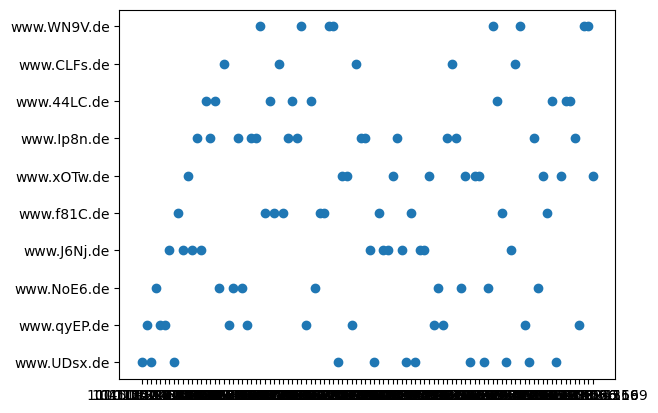

In [52]:
import matplotlib.pyplot as plt

#plt.figure(igsize=(15, 15))

#plt.scatter(grouped_logs['clientIp'], grouped_logs['timestamp'])
plt.scatter(grouped_logs['clientIp'], grouped_logs['host'])
plt.show()

### amount / client on a specific host

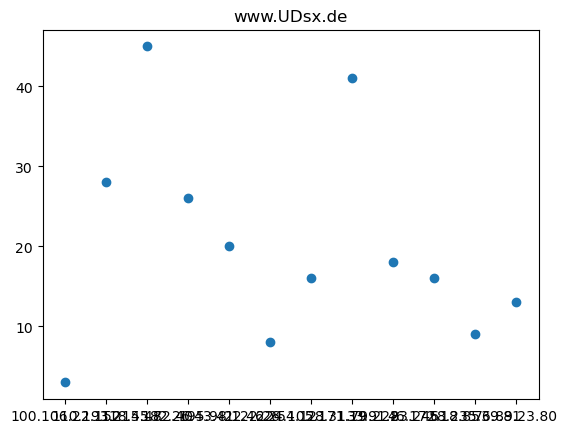

In [63]:
single_host = grouped_logs[grouped_logs['host'] == 'www.UDsx.de']

#plt.figure(figsize=(15, 15))

plt.title('www.UDsx.de')
plt.scatter(single_host['clientIp'], single_host['call_count'])
#plt.hist(single_host['clientIp'], bins=50)
plt.show()

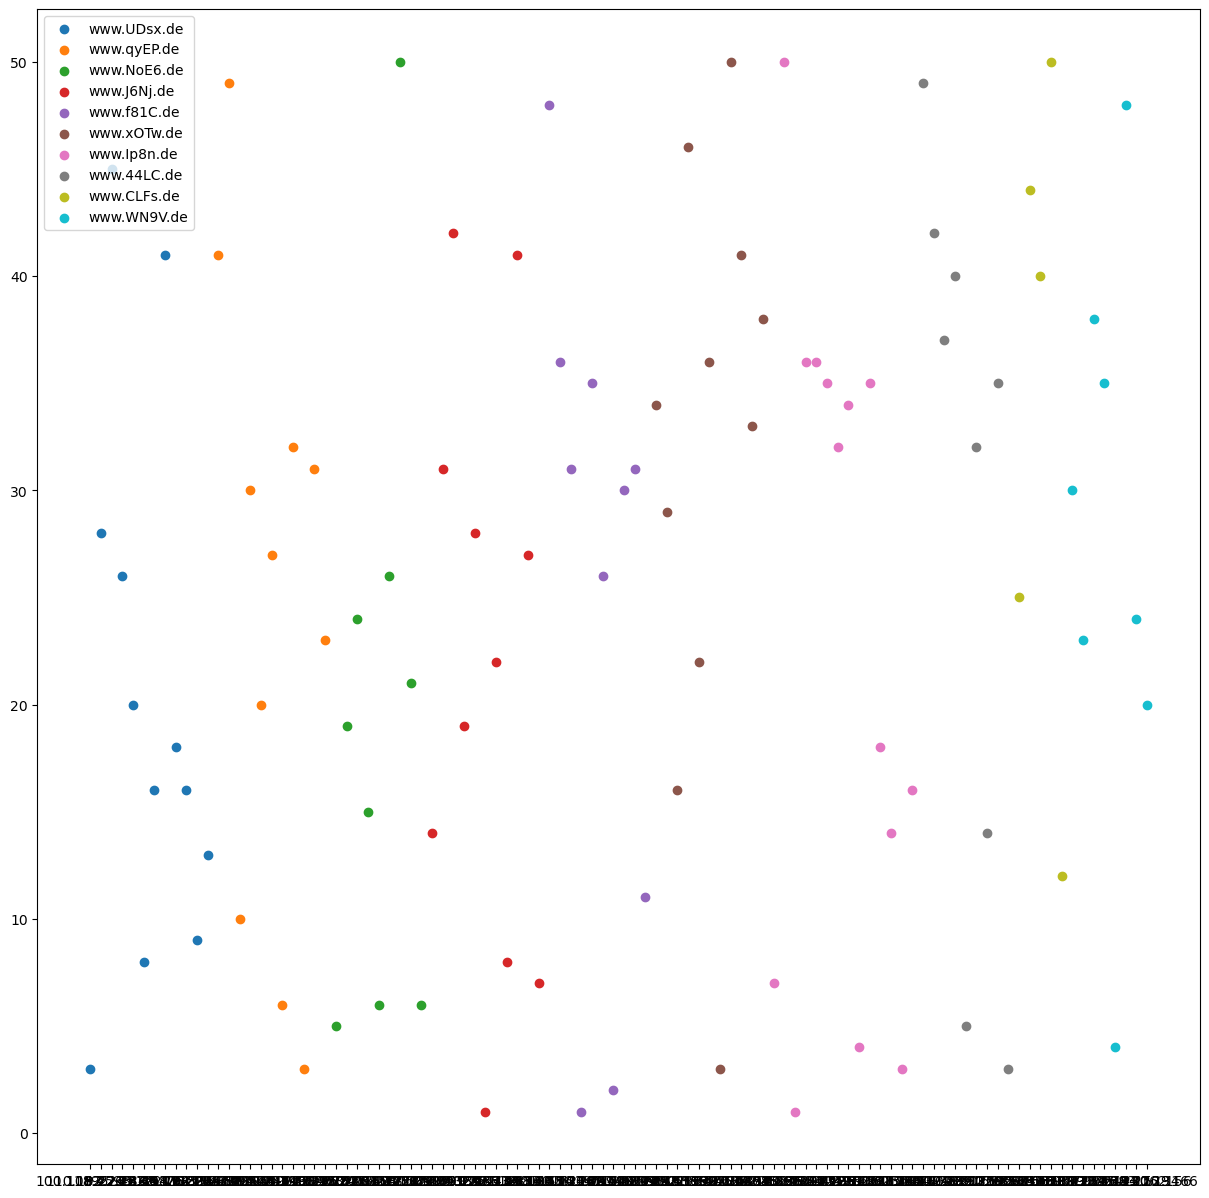

In [59]:
plt.figure(figsize=(15, 15))

hosts = grouped_logs['host'].unique()

for host in hosts:
    sh = grouped_logs[grouped_logs['host'] == host]
    plt.scatter(sh['clientIp'], sh['call_count'], label=host)

plt.legend()  
plt.show()

### amount / host on one client ip

In [60]:
host_ip_counts = logs.groupby(['host', 'clientIp']).size().reset_index(name='call_count')
host_ip_counts

,host,clientIp,call_count
0,www.44LC.de,104.215.18.178,2
1,www.44LC.de,110.193.215.48,2
2,www.44LC.de,115.147.226.201,5
3,www.44LC.de,118.224.87.137,3
4,www.44LC.de,118.45.72.40,7
...,...,...,...
800,www.xOTw.de,78.129.91.226,4
801,www.xOTw.de,8.212.139.166,2
802,www.xOTw.de,94.8.150.15,1
803,www.xOTw.de,95.249.153.156,3


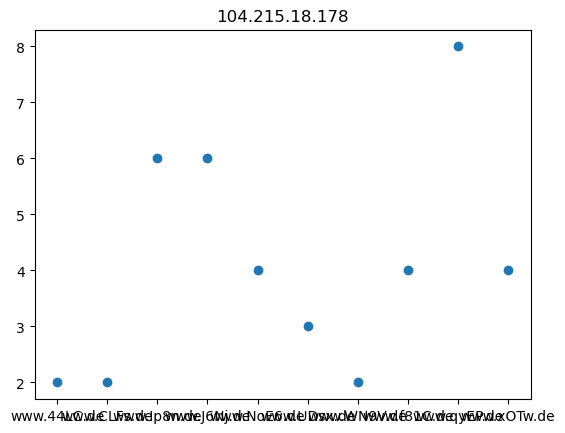

In [78]:
#plt.figure(figsize=(15, 10))

single_ip = host_ip_counts[host_ip_counts['clientIp'] == '104.215.18.178']

plt.title('104.215.18.178')
plt.scatter(single_ip['host'], single_ip['call_count'])

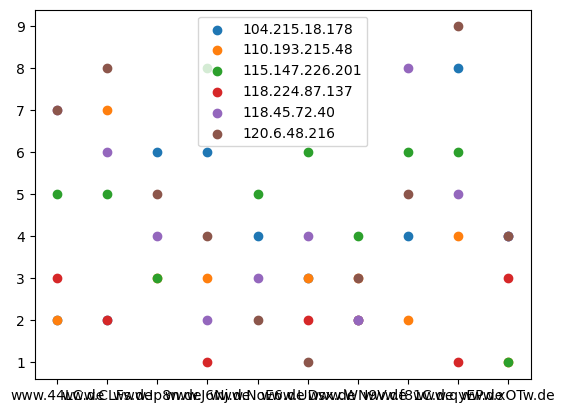

In [77]:
#plt.figure(figsize=(10, 20))

client_ips = host_ip_counts['clientIp'].unique()

counter = 0

for ip in client_ips:
    counter += 1
    si = host_ip_counts[host_ip_counts['clientIp'] == ip]
    plt.scatter(si['host'], si['call_count'], label=ip)
    
    if counter > 5:
        break

plt.legend()
plt.show()